# TabularDNN

Use `/usr/bin/python3.11 -m venv venvName` to make venv. Use `source venvName/bin/activate` to enter venv. Python will be 3.11 when used either `python` or `python3`. To get out of venv use `deactivate`. `rm -r venvName` to delete venv.

Use `pip install tensorflow[and-cuda]` to install and check with `python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"` to see if GPU is set up. If GPU devices are shown then everything is OK.

Use `pip install jupyter` to have jupyter-notebook in venv. Check with `which jupyter` to see if correct jupyter is used. Use `python -m ipykernel install --user --name=venvName` to add venv to jupyter kernels. When creating new notebook instead of using python3 use venvName. To remove venv kernel from jupyter use `jupyter kernelspec remove venvName`

In [152]:
! python --version

Python 3.11.7


In [153]:
import pandas as pd
print(f"Pandas Version: {pd.__version__}")

Pandas Version: 2.2.3


In [154]:
df = pd.read_csv("dataset/AQI.csv")
df.head()

,Date,Time,Temperature,Real Feel,Weather Status,Wind Gusts,Humidity,Indoor Humidity,Humidity Status,Dew Point,...,AQI,AQI-PM2.5,AQI-PM10,AQI-NO2,AQI-O3,Amount-PM2.5,Amount-PM10,Amount-NO2,Amount-O3,Filename
0,"FRIDAY, 18 OCTOBER",23:50,12,9,Cloudy,25,0.92,0.53,Ideal Humidity,10,...,35,20,17,35,11,5,12,17,31,Seattle/142.png
1,"WEDNESDAY, 9 OCTOBER",17:53,15,16,Mostly cloudy,8,0.74,0.53,Ideal Humidity,10,...,28,16,22,28,16,3,17,13,47,Seattle/27.png
2,"WEDNESDAY, 9 OCTOBER",19:13,15,15,Partly cloudy,7,0.75,0.54,Ideal Humidity,11,...,50,21,24,50,11,5,18,25,33,Seattle/28.png
3,"THURSDAY, 17 OCTOBER",06:22,9,9,Mostly cloudy,7,0.89,0.42,Ideal Humidity,7,...,25,11,9,25,10,2,7,12,29,Seattle/72.png
4,"TUESDAY, 8 OCTOBER",14:06,17,19,Mostly cloudy,10,0.89,0.74,Slightly Humid,15,...,41,20,18,41,6,4,13,20,17,Seattle/8.png


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2080 non-null   object 
 1   Time                2080 non-null   object 
 2   Temperature         2080 non-null   int64  
 3   Real Feel           2080 non-null   int64  
 4   Weather Status      2080 non-null   object 
 5   Wind Gusts          2080 non-null   int64  
 6   Humidity            2080 non-null   float64
 7   Indoor Humidity     2080 non-null   float64
 8   Humidity Status     2080 non-null   object 
 9   Dew Point           2080 non-null   int64  
 10  Pressure            2080 non-null   int64  
 11  Pressure Direction  2080 non-null   object 
 12  Cloud Cover         2080 non-null   float64
 13  Visibility          2080 non-null   float64
 14  Cloud Ceiling       2080 non-null   int64  
 15  AQI                 2080 non-null   int64  
 16  AQI-PM

In [156]:
# Used in training --> Conversion required for warning in normalization!
df = df.astype({
    "Temperature": "float64",
    "Real Feel": "float64",
    "Wind Gusts": "float64",
    "Dew Point": "float64",
    "Pressure": "float64",
    "Cloud Ceiling": "float64"
})

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2080 non-null   object 
 1   Time                2080 non-null   object 
 2   Temperature         2080 non-null   float64
 3   Real Feel           2080 non-null   float64
 4   Weather Status      2080 non-null   object 
 5   Wind Gusts          2080 non-null   float64
 6   Humidity            2080 non-null   float64
 7   Indoor Humidity     2080 non-null   float64
 8   Humidity Status     2080 non-null   object 
 9   Dew Point           2080 non-null   float64
 10  Pressure            2080 non-null   float64
 11  Pressure Direction  2080 non-null   object 
 12  Cloud Cover         2080 non-null   float64
 13  Visibility          2080 non-null   float64
 14  Cloud Ceiling       2080 non-null   float64
 15  AQI                 2080 non-null   int64  
 16  AQI-PM

#### Removing unnecessary columns + Only predicting AQI values for pollutants for now so drop others!

In [158]:
df = df.drop(["Date", "Time", "AQI", "Amount-PM2.5", "Amount-PM10", "Amount-NO2", "Amount-O3", "Filename"], axis = 1)

In [159]:
input_df = df.iloc[:, :-4]
input_df

,Temperature,Real Feel,Weather Status,Wind Gusts,Humidity,Indoor Humidity,Humidity Status,Dew Point,Pressure,Pressure Direction,Cloud Cover,Visibility,Cloud Ceiling
0,12.0,9.0,Cloudy,25.0,0.92,0.53,Ideal Humidity,10.0,1021.0,↔,0.99,15.0,800.0
1,15.0,16.0,Mostly cloudy,8.0,0.74,0.53,Ideal Humidity,10.0,1021.0,↑,0.76,23.0,6100.0
2,15.0,15.0,Partly cloudy,7.0,0.75,0.54,Ideal Humidity,11.0,1022.0,↑,0.37,19.0,10700.0
3,9.0,9.0,Mostly cloudy,7.0,0.89,0.42,Ideal Humidity,7.0,1013.0,↔,0.76,16.0,1200.0
4,17.0,19.0,Mostly cloudy,10.0,0.89,0.74,Slightly Humid,15.0,1015.0,↔,0.77,16.0,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,26.0,29.0,Partly sunny,22.0,0.74,0.74,Very Humid,21.0,1017.0,↔,0.45,16.0,6500.0
2076,27.0,29.0,Mostly sunny,26.0,0.72,0.72,Very Humid,22.0,1020.0,↑,0.25,16.0,9100.0
2077,25.0,26.0,Partly cloudy,16.0,0.77,0.77,Very Humid,21.0,1016.0,↑,0.39,16.0,9100.0
2078,28.0,28.0,Mostly sunny,39.0,0.60,0.60,Very Humid,19.0,1019.0,↔,0.22,16.0,9100.0


In [160]:
output_df = df.iloc[:, -4:]
output_df

,AQI-PM2.5,AQI-PM10,AQI-NO2,AQI-O3
0,20,17,35,11
1,16,22,28,16
2,21,24,50,11
3,11,9,25,10
4,20,18,41,6
...,...,...,...,...
2075,27,18,1,11
2076,35,24,2,15
2077,29,20,1,11
2078,34,24,1,16


In [161]:
weatherStatus = pd.get_dummies(df["Weather Status"], dtype = float, drop_first = True)
humidityStatus = pd.get_dummies(df["Humidity Status"], dtype = float, drop_first = True)
pressureDirection = pd.get_dummies(df["Pressure Direction"], dtype = float, drop_first = True)

print(f"Weather Status One-Hot Shape: f{weatherStatus.shape}")
print(f"Humidity Status One-Hot Shape: f{humidityStatus.shape}")
print(f"Pressure Direction One-Hot Shape: f{pressureDirection.shape}")

Weather Status One-Hot Shape: f(2080, 17)
Humidity Status One-Hot Shape: f(2080, 8)
Pressure Direction One-Hot Shape: f(2080, 2)


In [162]:
input_df = input_df.drop(["Weather Status", "Humidity Status", "Pressure Direction"], axis = 1)
input_df = pd.concat([input_df, weatherStatus, humidityStatus, pressureDirection], axis = 1)
input_df

,Temperature,Real Feel,Wind Gusts,Humidity,Indoor Humidity,Dew Point,Pressure,Cloud Cover,Visibility,Cloud Ceiling,...,Dry,Extremely Humid,Humid,Ideal Humidity,Slightly Dry,Slightly Humid,Very Dry,Very Humid,↓,↔
0,12.0,9.0,25.0,0.92,0.53,10.0,1021.0,0.99,15.0,800.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,15.0,16.0,8.0,0.74,0.53,10.0,1021.0,0.76,23.0,6100.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.0,15.0,7.0,0.75,0.54,11.0,1022.0,0.37,19.0,10700.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,9.0,7.0,0.89,0.42,7.0,1013.0,0.76,16.0,1200.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,17.0,19.0,10.0,0.89,0.74,15.0,1015.0,0.77,16.0,900.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,26.0,29.0,22.0,0.74,0.74,21.0,1017.0,0.45,16.0,6500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2076,27.0,29.0,26.0,0.72,0.72,22.0,1020.0,0.25,16.0,9100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2077,25.0,26.0,16.0,0.77,0.77,21.0,1016.0,0.39,16.0,9100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2078,28.0,28.0,39.0,0.60,0.60,19.0,1019.0,0.22,16.0,9100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [163]:
output_df

,AQI-PM2.5,AQI-PM10,AQI-NO2,AQI-O3
0,20,17,35,11
1,16,22,28,16
2,21,24,50,11
3,11,9,25,10
4,20,18,41,6
...,...,...,...,...
2075,27,18,1,11
2076,35,24,2,15
2077,29,20,1,11
2078,34,24,1,16


In [164]:
import keras
from sklearn.model_selection import KFold
print(f"Keras Version: {keras.__version__}")

Keras Version: 3.6.0


## Model

In [165]:
def get_model():
    inputs = keras.Input(shape = (37,))
    x = keras.layers.Dense(32, activation = "relu")(inputs)
    x = keras.layers.Dense(16, activation = "relu")(x)
    x = keras.layers.Dense(16, activation = "relu")(x)
    x = keras.layers.Dense(8, activation = "relu")(x)
    outputs = keras.layers.Dense(4)(x)
    
    model = keras.Model(inputs = inputs, outputs = outputs, name = "TabularDNN")
    model.compile(
        loss = keras.losses.MeanSquaredError(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [166]:
get_model().summary()

Model: "TabularDNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_55 (InputLayer)     │ (None, 37)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_263 (Dense)               │ (None, 32)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_264 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_265 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_266 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_267 (Dense)               │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,188 (8.55 KB)

 Trainable params: 2,188 (8.55 KB)

 Non-trainable params: 0 (0.00 B)

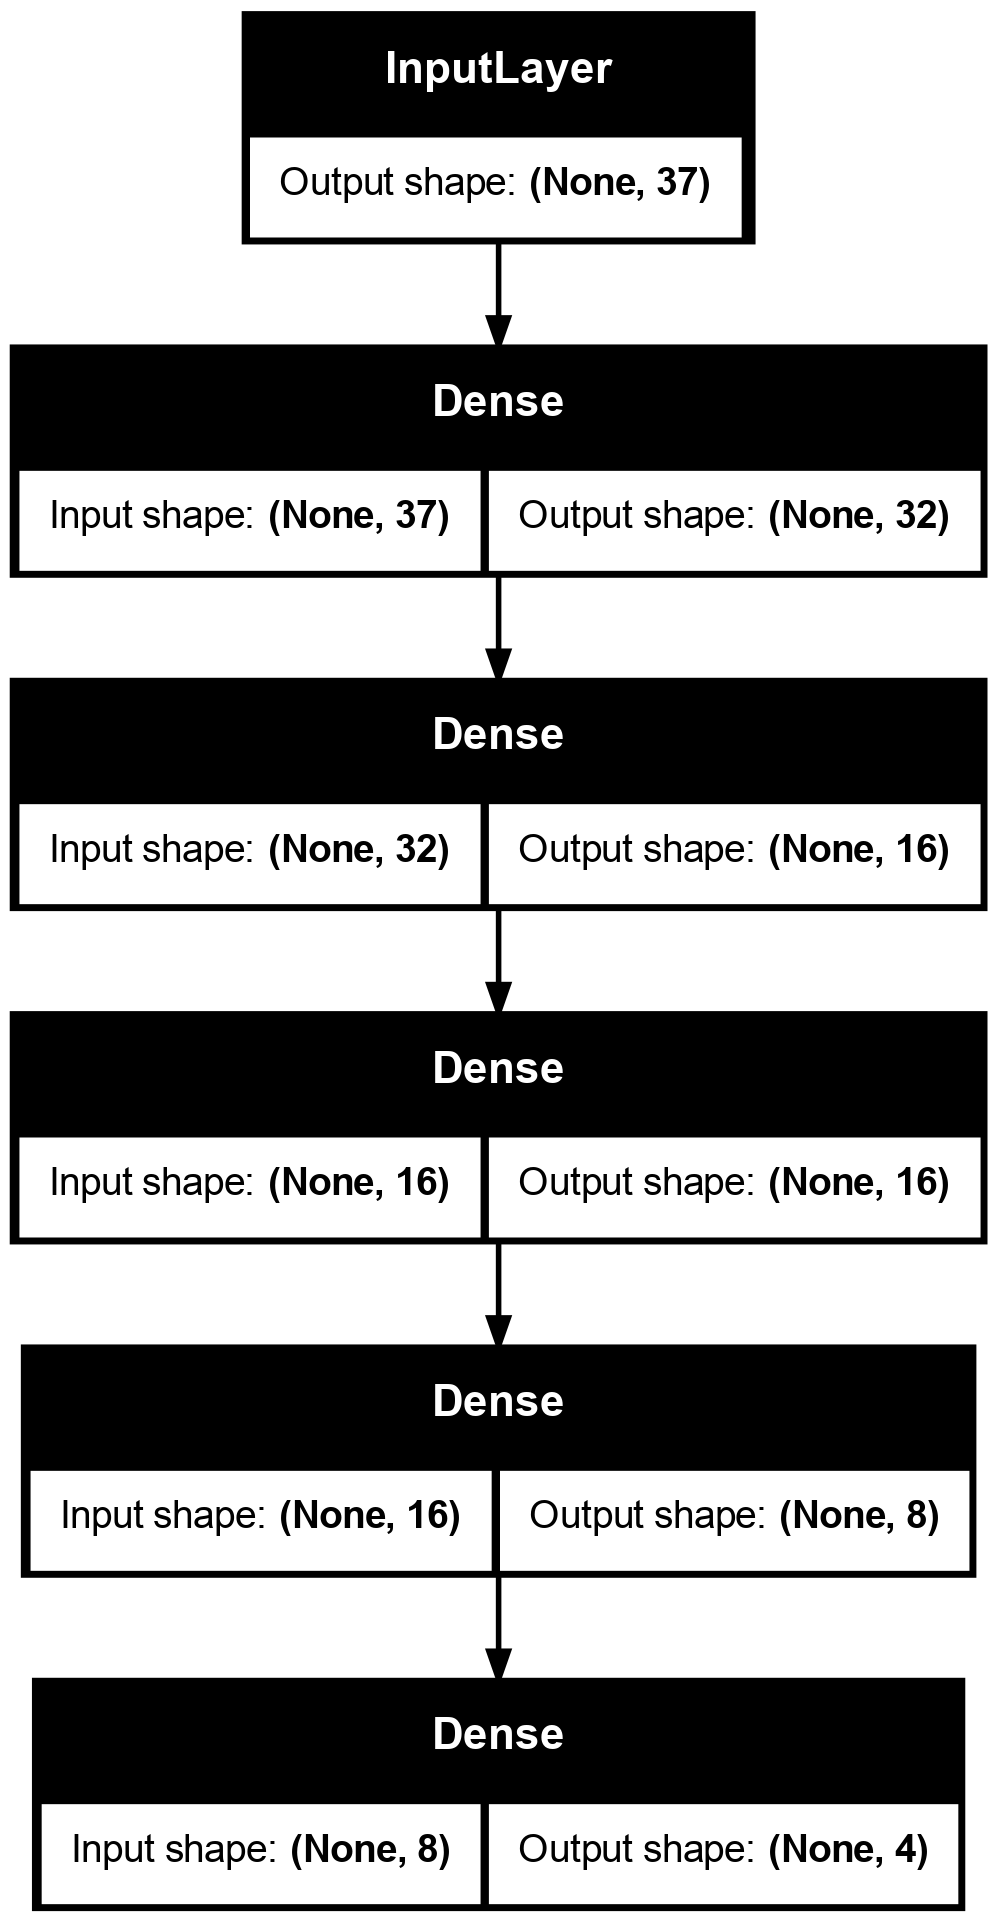

In [167]:
keras.utils.plot_model(get_model(), show_shapes = True)

In [168]:
i = 1
kf = KFold(n_splits = 5)
pred_accs = []; pred_losses = []
for train_idx, test_idx in kf.split(input_df, output_df):
    print(f"========================= Fold {i} =========================")
    i += 1
    
    train_X = input_df.iloc[train_idx]; train_Y = output_df.iloc[train_idx]
    test_X = input_df.iloc[test_idx]; test_Y = output_df.iloc[test_idx]

    temp_train_X = train_X.loc[:, :"Cloud Ceiling"]
    train_X.loc[:, :"Cloud Ceiling"] = (temp_train_X - temp_train_X.min()) / (temp_train_X.max() - temp_train_X.min())
    temp_test_X = test_X.loc[:, :"Cloud Ceiling"]
    test_X.loc[:, :"Cloud Ceiling"] = (temp_test_X - temp_test_X.min()) / (temp_test_X.max() - temp_test_X.min())

    # Z-score Normalization if anyone wants!
    # train_X = (train_X - train_X.mean()) / train_X.std()
    # test_X = (test_X - test_X.mean()) / test_X.std()    

    # In normalization because of one-hot there were some NaN values --> all zeros in one training group, all ones in testing group
    # This shows where is training we have NaN --> If we have NaN in training then we will have NaN loss in training!
    # print(train_X.columns[train_X.isnull().any()])
    
    model = get_model()
    
    history = model.fit(
        train_X,
        train_Y,
        batch_size = 32,
        epochs = 150,
        validation_data = (test_X, test_Y)
    )
    
    pred_loss, pred_acc = model.evaluate(test_X, test_Y)
    pred_accs.append(pred_acc); pred_losses.append(pred_loss)

========================= Fold 1 =========================
Epoch 1/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2264 - loss: 1021.0868 - val_accuracy: 0.3125 - val_loss: 1006.5107
Epoch 2/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2282 - loss: 984.6911 - val_accuracy: 0.3125 - val_loss: 815.8487
Epoch 3/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2196 - loss: 673.4374 - val_accuracy: 0.3125 - val_loss: 441.7382
Epoch 4/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2230 - loss: 360.5892 - val_accuracy: 0.3125 - val_loss: 380.8295
Epoch 5/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2456 - loss: 298.8350 - val_accuracy: 0.3125 - val_loss: 356.7557
Epoch 6/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2303 - loss: 266.4583 - val_accuracy: 0.3125 - val_loss: 349.3438
Epoch 7/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2282 - loss: 273.4949 - val_accuracy: 0.3125 - val_loss: 350.5177
Epoch 8/150
52/52 ━━━━

In [169]:
import numpy as np

In [170]:
print(f"Accuracy: {np.mean(pred_accs)} ± {np.std(pred_accs)}")
print(f"Loss: {np.mean(pred_losses)} ± {np.std(pred_losses)}")

Accuracy: 0.47115384340286254 ± 0.02062271446135607
Loss: 303.17234497070314 ± 106.02902718996876
